<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Файл-клиента-xmlrpc_client_p3.ipynb-на-Python-3" data-toc-modified-id="Файл-клиента-xmlrpc_client_p3.ipynb-на-Python-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Файл клиента xmlrpc_client_p3.ipynb на Python 3</a></span></li></ul></div>

#### Файл клиента xmlrpc_client_p3.ipynb на Python 3

In [ ]:
# xmlrpc_client.ipynb

import xmlrpc.client

server = xmlrpc.client.ServerProxy("http://localhost:8009")

print(server.system.listMethods())

print ('Ping:', server.ping())
print ('Server datetime:', server.now())
print ('View, type, value:', server.type(2))
print ('View, type, value:', server.type(2.))
print ('View, type, value:', server.type('My string'))
print ('View, type, value:', server.type("My string"))
print ('View, type, value:', server.type([1,2,3]))
print ('View, type, value:', server.type(["one", "two", "three"]))
print ('View, type, value:', server.type((1,2,"3")))
print ('Sum 2 + 3 :', server.sum(2, 3))
print ('Pow 2^3: ', server.pow(2, 3))


['binary_threshold', 'black_list_check', 'black_list_check_fio_birth', 'color_inversion', 'now', 'ping', 'pow', 'send_back_binary', 'sum', 'system.listMethods', 'system.methodHelp', 'system.methodSignature', 'type', 'vertical_flip']
Ping: True
Server datetime: 20241026T22:08:16
View, type, value: ['2', "<class 'int'>", 2]


In [3]:
server_stat = xmlrpc.client.ServerProxy("http://localhost:8018")
start_time ='2024-10-26 17:00:00'
end_time = '2024-10-26 22:00:00'

logs = server_stat.get_logs('ping', start_time, end_time)

logs

[['ping', '2024-10-26 19:57:50', 2.049154],
 ['ping', '2024-10-26 19:59:23', 2.040429],
 ['ping', '2024-10-26 20:01:54', 2.041609],
 ['ping', '2024-10-26 20:04:04', 2.029241]]

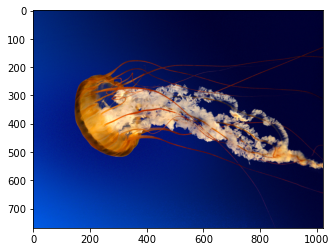

In [4]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение
import xmlrpc.client


# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')
# img = Image.open('11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

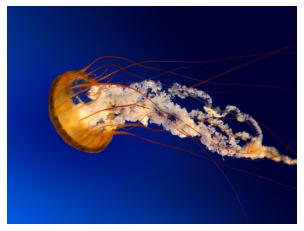

In [5]:
from PIL import Image  # Работа с изображением
import numpy as np  # Используем numpy вместо pylab
import matplotlib.pyplot as plt  # Для отображения

# Режим отображения внутри ноутбука
%matplotlib inline

# Исходное изображение
plt.imshow(img_arr)
plt.axis('off')  # Отключить оси
plt.show()

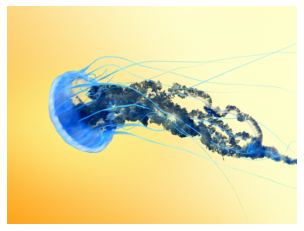

In [7]:
import pickle
import xmlrpc.client
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Подключение к прокси-серверу
server = xmlrpc.client.ServerProxy("http://localhost:8009")

# Функция инверсии цвета изображения через сервер
def inv_color(img_arr_in):
    # Сериализация изображения для передачи на сервер
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    # Отправка запроса инверсии цветов на сервер
    img_bin2 = server.color_inversion(img_bin)
    
    # Десериализация ответа сервера
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = np.array(img)

img_arr_inv = inv_color(img_arr)

# Показ изображения с инверсией цвета
plt.gray()
plt.imshow(img_arr_inv)
plt.axis('off')  # Отключить оси
plt.show()


In [8]:
print(server.black_list_check_fio_birth('Петров','Петр', 'Петрович', '22.03.1989'))
print(server.black_list_check_fio_birth('Иванов', 'Иван', 'Иванович', '22.03.1989'))
print(server.black_list_check_fio_birth('Петров', 'Иван', 'Иванович', '22.03.1989'))


Петров Петр Петрович, 22.03.1989: good_boy
Иванов Иван Иванович, 22.03.1989: bad_boy
Петров Иван Иванович, 22.03.1989: good_boy


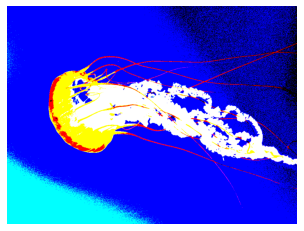

In [9]:
threshold_value = 50  # Пример порога
# Функция инверсии цвета изображения через сервер
def bin_color(img_arr_in, val):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    img_bin2 = server.binary_threshold(img_bin, val)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out


img_arr = array(img)

img_arr_inv = bin_color(img_arr, threshold_value)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.axis('off')  # Отключить оси
plt.show()

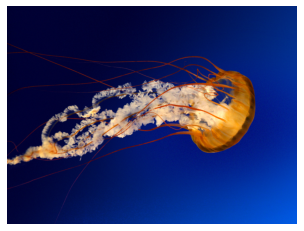

In [10]:
# Функция инверсии цвета изображения через сервер
def rotate(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    img_bin2 = server.vertical_flip(img_bin)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = array(img)

img_arr_inv = rotate(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.axis('off')  # Отключить оси
plt.show()